In [1]:
from __future__ import absolute_import, division, print_function
import tensorflow as tf
import tensorflow.keras as keras
import tensorflow.keras.layers as layers
print(tf.__version__)

2.0.0


In [2]:
vocab_size = 10000
(train_x, train_y), (test_x, text_y) = keras.datasets.imdb.load_data(num_words=vocab_size)
print(train_x[0])
print(train_x[1])

17465344/17464789 [==============================] - 118s 7us/step
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 17

In [4]:

word_index = keras.datasets.imdb.get_word_index()
word_index = {k:(v+3) for k,v in word_index.items()}
word_index['<PAD>'] = 0
word_index['<START>'] = 1
word_index['<UNK>'] = 2
word_index['<UNUSED>'] = 3
reverse_word_index = {v:k for k, v in word_index.items()}
def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])
print(decode_review(train_x[0]))

1646592/1641221 [==============================] - 24s 14us/step
<START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNK> to the two little boy's that played the <UNK> of norman and paul they were just brilliant children are often left out of the <UNK> list i think because the stars that play them all grown up are such a big profile for the whole 

In [5]:
maxlen = 500
train_x = keras.preprocessing.sequence.pad_sequences(train_x,value=word_index['<PAD>'],
                                                    padding='post', maxlen=maxlen)
test_x = keras.preprocessing.sequence.pad_sequences(test_x,value=word_index['<PAD>'],
                                                    padding='post', maxlen=maxlen)

In [6]:
embedding_dim = 16
model = keras.Sequential([
    layers.Embedding(vocab_size, embedding_dim, input_length=maxlen),
    layers.GlobalAveragePooling1D(),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
    
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 500, 16)           160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 16)                272       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 160,289
Trainable params: 160,289
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.compile(optimizer=keras.optimizers.Adam(),
             loss=keras.losses.BinaryCrossentropy(),
             metrics=['accuracy'])
history = model.fit(train_x, train_y, epochs=30, batch_size=512, validation_split=0.1)

Train on 22500 samples, validate on 2500 samples
Epoch 1/30
22500/22500 [==============================] - 2s 106us/sample - loss: 0.6925 - accuracy: 0.5351 - val_loss: 0.6912 - val_accuracy: 0.5748
Epoch 2/30
22500/22500 [==============================] - 1s 57us/sample - loss: 0.6877 - accuracy: 0.6384 - val_loss: 0.6824 - val_accuracy: 0.6948
Epoch 3/30
22500/22500 [==============================] - 1s 55us/sample - loss: 0.6726 - accuracy: 0.7217 - val_loss: 0.6602 - val_accuracy: 0.7444
Epoch 4/30
22500/22500 [==============================] - 1s 47us/sample - loss: 0.6414 - accuracy: 0.7564 - val_loss: 0.6216 - val_accuracy: 0.7588
Epoch 5/30
22500/22500 [==============================] - 1s 53us/sample - loss: 0.5948 - accuracy: 0.7906 - val_loss: 0.5706 - val_accuracy: 0.8008
Epoch 6/30
22500/22500 [==============================] - 1s 48us/sample - loss: 0.5398 - accuracy: 0.8201 - val_loss: 0.5182 - val_accuracy: 0.8248
Epoch 7/30
22500/22500 [==============================] 

In [31]:
import guang
from imp import reload
reload(guang.Utils.plotly)

<module 'guang.Utils.plotly' from '/home/caloi/miniconda3/lib/python3.7/site-packages/guang/Utils/plotly.py'>

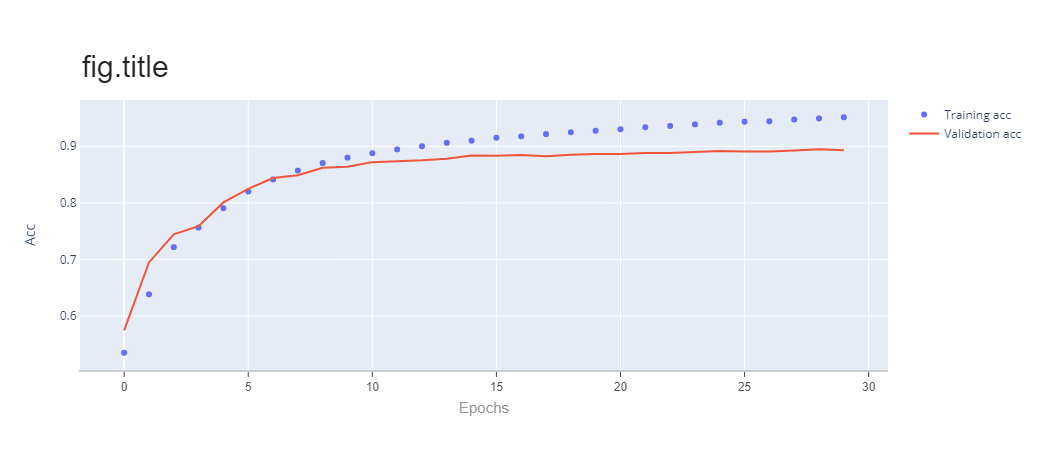

In [37]:
from guang.Utils.plotly import Multiplots, Subplots

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1, len(acc) + 1)
fig = Multiplots()
fig.plot(acc, mode='markers', label='Training acc')
fig.plot( val_acc, label='Validation acc')
# plt.title('Training and validation accuracy')
fig.x_label='Epochs'
fig.y_label='Acc'
# plt.ylabel('Accuracy')
# plt.legend(loc='lower right')
# plt.figure(figsize=(16,9))

fig.show()